# EQUITY VARIANCE SWAP - VALUATION AND RISK ANALYSIS

Valuation and Risk of a Variance Swap.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import *
from financepy.market.curves import *
from financepy.products.equity import *
from financepy.market.volatility import *

####################################################################
#    FINANCEPY Version 1.1 - This build: 27 Aug 2025 at 23:27      #
#     This software is distributed FREE AND WITHOUT ANY WARRANTY   #
#  Report bugs as issues at https://github.com/domokane/FinancePy  #
####################################################################



# Variance Swap

All the assets in the basket have the same characteristicsm

In [3]:
start_dt = Date(20, 3, 2018)
tenor = "3M"
strike = 0.3*0.3

In [4]:
print("Strike Variance:", strike)

Strike Variance: 0.09


The strike of the variance swap is at 9%

In [5]:
vol_swap = EquityVarianceSwap(start_dt, tenor, strike)

## Valuation

In [6]:
value_dt = Date(20, 3, 2018)

In [7]:
r = 0.05
discount_curve = DiscountCurveFlat(value_dt, r)

In [8]:
stock_price = 100.0
dividend_yield = 0.0
maturity_dt = start_dt.add_months(3)

In [9]:
def vol_skew(K, atm_vol, atmK, skew):
    v = atm_vol + skew * (K-atmK)
    return v

We now define the volatility curve

In [10]:
atm_vol = 0.20
atmK = 100.0
skew = 0
strikes = np.linspace(50.0, 135.0, 18)
vols = vol_skew(strikes, atm_vol, atmK, skew)
vol_curve = EquityVolCurve(value_dt, maturity_dt, strikes, vols)

Text(0, 0.5, 'Volatility')

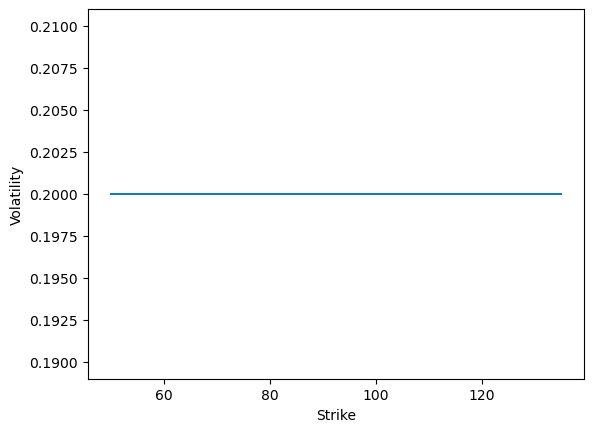

In [11]:
plt.plot(strikes, vols)
plt.xlabel("Strike")
plt.ylabel("Volatility")

In [12]:
strike_spacing = 5.0
num_call_options = 10
num_put_options = 10

In [13]:
dividend_curve = DiscountCurveFlat(value_dt, dividend_yield)

In [14]:
k1 = vol_swap.fair_strike(value_dt, stock_price, dividend_curve,
                        vol_curve, num_call_options, num_put_options,
                        strike_spacing, discount_curve, False)
print("Fair strike:", k1)

Fair strike: 0.041661964166824966


In [15]:
k2 = vol_swap.fair_strike_approx(value_dt, stock_price, strikes, vols)
print("DERMAN SKEW APPROX for K:", k2)

DERMAN SKEW APPROX for K: 0.04000000000000001


In [16]:
vol_swap.print_weights()

TYPE STRIKE WEIGHT
PUT   55.00  13169.839
PUT   60.00  11058.975
PUT   65.00   9418.167
PUT   70.00   8117.442
PUT   75.00   7068.860
PUT   80.00   6211.188
PUT   85.00   5500.721
PUT   90.00   4905.588
PUT   95.00   4402.101
PUT  100.00   2052.402
CALL  100.00   1919.957
CALL  105.00   3602.627
CALL  110.00   3282.228
CALL  115.00   3002.757
CALL  120.00   2757.527
CALL  125.00   2541.164
CALL  130.00   2349.307
CALL  135.00   2178.390
CALL  140.00   2025.471
CALL  145.00   1888.110


Copyright (c) 2020 Dominic O'Kane